# Step 1 - Testing all possible models

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load the data
nltk_data = pd.read_csv('nltk_embeddings.csv')
spacy_data = pd.read_csv('spacy_embeddings.csv')

# Drop unnecessary columns
columns_to_drop = ['id', 'qid1', 'qid2', 'clean_question1', 'clean_question2']
nltk_data.drop(columns=columns_to_drop, inplace=True)
spacy_data.drop(columns=columns_to_drop, inplace=True)

# Combining NLTK and spaCy embeddings
combined_data = pd.concat([nltk_data.drop(columns='is_duplicate'), spacy_data.drop(columns='is_duplicate')], axis=1)
target = spacy_data['is_duplicate']  # Assuming is_duplicate columns are the same in both dataframes

# Separate features and target
X = combined_data
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list to store results
results = []

# Function to evaluate models
def evaluate_model(model, name):
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')
    results.append((name, accuracy, f1))

# Models to evaluate
models = [
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GradientBoostingClassifier(), "Gradient Boosting"),
    (SVC(), "SVC"),
    (MLPClassifier(max_iter=300), "MLP Neural Network"),
    (GaussianNB(), "Gaussian Naive Bayes"),
    (KNeighborsClassifier(), "KNN")
]

# Evaluate models
for model, name in models:
    evaluate_model(model, name)

# Display results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score'])
print(results_df)


c:\Users\Yash Joshi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                  Model  Accuracy  F1 Score
0   Logistic Regression    0.7130  0.591168
1         Random Forest    0.7305  0.586973
2     Gradient Boosting    0.7480  0.642553
3                   SVC    0.7560  0.647399
4    MLP Neural Network    0.7370  0.651194
5  Gaussian Naive Bayes    0.6600  0.578686
6                   KNN    0.7115  0.578524


# Step 2 - Fine tuning top 3 models

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define pipelines for each model with StandardScaler and the model
pipelines = {
    'SVC': Pipeline([('scaler', StandardScaler()), ('SVC', SVC())]),
    'MLP': Pipeline([('scaler', StandardScaler()), ('MLP', MLPClassifier(max_iter=300))]),
    'GradientBoosting': Pipeline([('scaler', StandardScaler()), ('GradientBoosting', GradientBoostingClassifier())]),
}

# Define parameter grids for each model
param_grids = {
    'SVC': {
        'SVC__C': [0.1, 1, 10],
        'SVC__kernel': ['linear', 'rbf'],
        'SVC__gamma': ['scale', 'auto']
    },
    'MLP': {
        'MLP__hidden_layer_sizes': [(50,), (100,), (50,50)],
        'MLP__activation': ['relu', 'tanh'],
        'MLP__solver': ['adam', 'sgd'],
        'MLP__learning_rate_init': [0.001, 0.01],
    },
    'GradientBoosting': {
        'GradientBoosting__n_estimators': [100, 200],
        'GradientBoosting__learning_rate': [0.01, 0.1],
        'GradientBoosting__max_depth': [3, 5, 7]
    }
}

# Results dictionary
tuning_results = {}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    tuning_results[model_name] = {'Best Model': best_model, 'Best Params': best_params, 'Best Score': best_score}

# Display fine-tuning results
for model_name, results in tuning_results.items():
    print(f"Model: {model_name}")
    print(f"Best Score: {results['Best Score']}")
    print(f"Best Parameters: {results['Best Params']}\n")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Yash Joshi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Model: SVC
Best Score: 0.75725
Best Parameters: {'SVC__C': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

Model: MLP
Best Score: 0.7415
Best Parameters: {'MLP__activation': 'relu', 'MLP__hidden_layer_sizes': (50,), 'MLP__learning_rate_init': 0.001, 'MLP__solver': 'sgd'}

Model: GradientBoosting
Best Score: 0.7565000000000001
Best Parameters: {'GradientBoosting__learning_rate': 0.1, 'GradientBoosting__max_depth': 5, 'GradientBoosting__n_estimators': 200}



/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


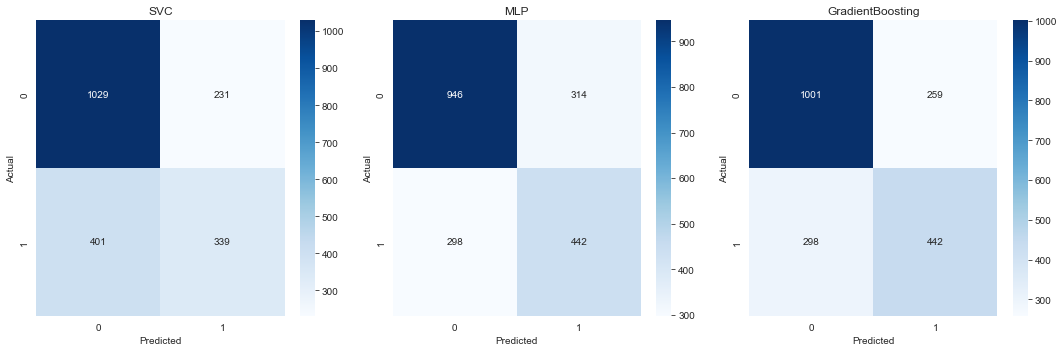

In [9]:
# plot the confusion matrices for the top 3 models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

top_models = {
    'SVC': Pipeline([('scaler', StandardScaler()), ('SVC', SVC(C=1, probability=True, gamma='scale', kernel='rbf'))]),
    'MLP': Pipeline([('scaler', StandardScaler()), ('MLP', MLPClassifier(activation='relu', hidden_layer_sizes=(50,), learning_rate_init=0.001, solver='sgd', max_iter=300))]),
    'GradientBoosting': Pipeline([('scaler', StandardScaler()), ('GradientBoosting', GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200))]),
}

# Train the top 3 models
for model_name, pipeline in top_models.items():
    pipeline.fit(X_train, y_train)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (model_name, pipeline) in zip(axes, top_models.items()):
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

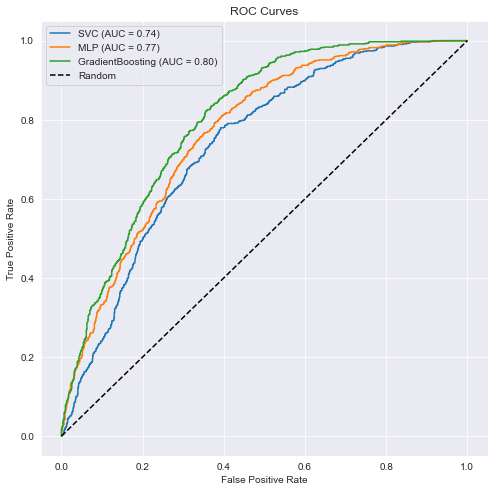

In [10]:
# plot the ROC curves and AUC for the top 3 models
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curves and AUC
fig, ax = plt.subplots(figsize=(8, 8))
for model_name, pipeline in top_models.items():
    y_pred = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    ax.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend()
plt.show()

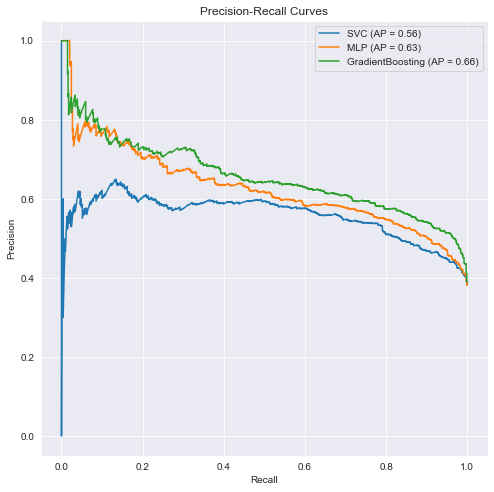

In [11]:
# plot the precision-recall curves for the top 3 models
from sklearn.metrics import precision_recall_curve, average_precision_score

# Plot precision-recall curves
fig, ax = plt.subplots(figsize=(8, 8))
for model_name, pipeline in top_models.items():
    y_pred = pipeline.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    ap = average_precision_score(y_test, y_pred)
    ax.plot(recall, precision, label=f"{model_name} (AP = {ap:.2f})")
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves')
ax.legend()
plt.show()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scip

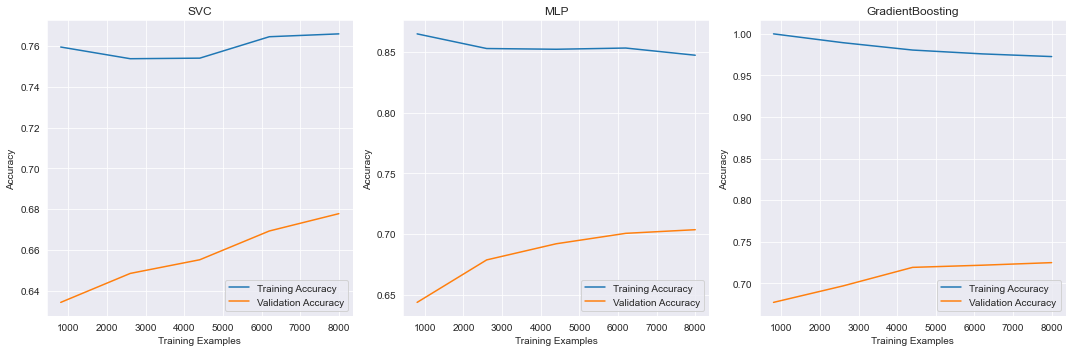

In [16]:
# visualize the learning curves for the top 3 models

from sklearn.model_selection import learning_curve
import numpy as np

# Function to plot learning curves
def plot_learning_curve(model, X, y, ax, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    ax.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    ax.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('Accuracy')
    ax.set_title('Learning Curves')
    ax.legend()

# Plot learning curves
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (model_name, pipeline) in zip(axes, top_models.items()):
    plot_learning_curve(pipeline, X, y, ax)
    ax.set_title(model_name)
plt.tight_layout()
plt.show()

In [17]:
# error analysis for the top 3 models

# Function to display error analysis
def display_error_analysis(model, X, y, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = X_test[y_pred != y_test]
    error_indices = y_test[y_pred != y_test].index
    print(f"Number of errors: {len(errors)}")
    print(f"Error rate: {len(errors) / len(X_test) * 100:.2f}%")
    print(f"Error indices: {error_indices}")

# visualise the error analysis
for model_name, pipeline in top_models.items():
    print(f"Error analysis for {model_name}")
    display_error_analysis(pipeline, X, y, X_test, y_test)


Model: SVC
Number of errors: 632
Error rate: 31.60%
Error indices: Int64Index([1731, 4742, 5202, 5272, 4640, 4947, 8847, 8328, 3973, 6630,
            ...
            1921, 3621, 4848, 2291, 5289, 3018, 1770, 1888, 7846, 7853],
           dtype='int64', length=632)

Model: MLP
Number of errors: 612
Error rate: 30.60%
Error indices: Int64Index([1731, 4742, 4521,  576, 3999, 6033, 4640, 9485,  321, 8328,
            ...
            1921, 3621, 4848, 5289, 4698, 3018,   17, 9432, 8285, 7853],
           dtype='int64', length=612)

Model: GradientBoosting
Number of errors: 557
Error rate: 27.85%
Error indices: Int64Index([ 576, 5272, 3999, 6033, 9930, 9920,  321, 8328, 6630, 1513,
            ...
            1921, 3621, 4848, 5289, 4698,   17, 1888, 2152, 9432, 8285],
           dtype='int64', length=557)

